# Lineages of planaria: the epidermal lineage

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()

Running Scanpy 0.4.2.post2 on 2018-02-06 15:43.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [29]:
adata_full = sc.read('./data/171202/reg.dge.txt', cache=True).transpose()

... reading from cache file ./write/data/171202/reg.dge.h5


In [30]:
sc.pp.log1p(adata_full)

## Pseudotime series

No matter which definition for the epidermal markers we use, we obtain almost same results below.

In [31]:
# this uses marker genes for clusters obtained using Seurat
markers = pd.read_csv('./data/171202/epidermal_lineage.top10.markers.txt', sep='\t')
# markers = pd.read_csv('./data/171202/epidermal_lineage_markers.txt', sep='\t')
epidermal_markers = markers['gene'].values

# this uses the markers from the Wurtzel paper
# markers = pd.read_csv('./data/171202/Epidermal_markers_wurtzel.csv', header=None, sep='\t')
# epidermal_markers = markers[1].values
# epidermal_markers = [gene for gene in epidermal_markers if gene in adata_full.var_names]

In [32]:
adata = sc.read('./write/planaria_171202_R.h5ad')

In [33]:
adata_full.obs = adata.obs
adata_full.uns['clusters_colors'] = adata.uns['clusters_colors']

In [34]:
path_1 = ['neoblast 1',
          'epidermal neoblasts', 'early epidermal progenitors',
          'late epidermal progenitors 1',
          'late epidermal progenitors 2', 'epidermis']

In [35]:
sc.settings.set_figure_params(dpi=150)

There is significant overlap in all stages of the epidermal lineage except for the last - the transition to the epidermis cluster seems disconnected.

Only the following markers seem to be connecting the late epidermal progenitors with the epidermis:     'dd_Smed_v6_80_0', 'dd_Smed_v6_146_0', 'dd_Smed_v6_2178_0', 'dd_Smed_v6_18_0'

saving figure to file ./figures/aga_path_epidermal.png


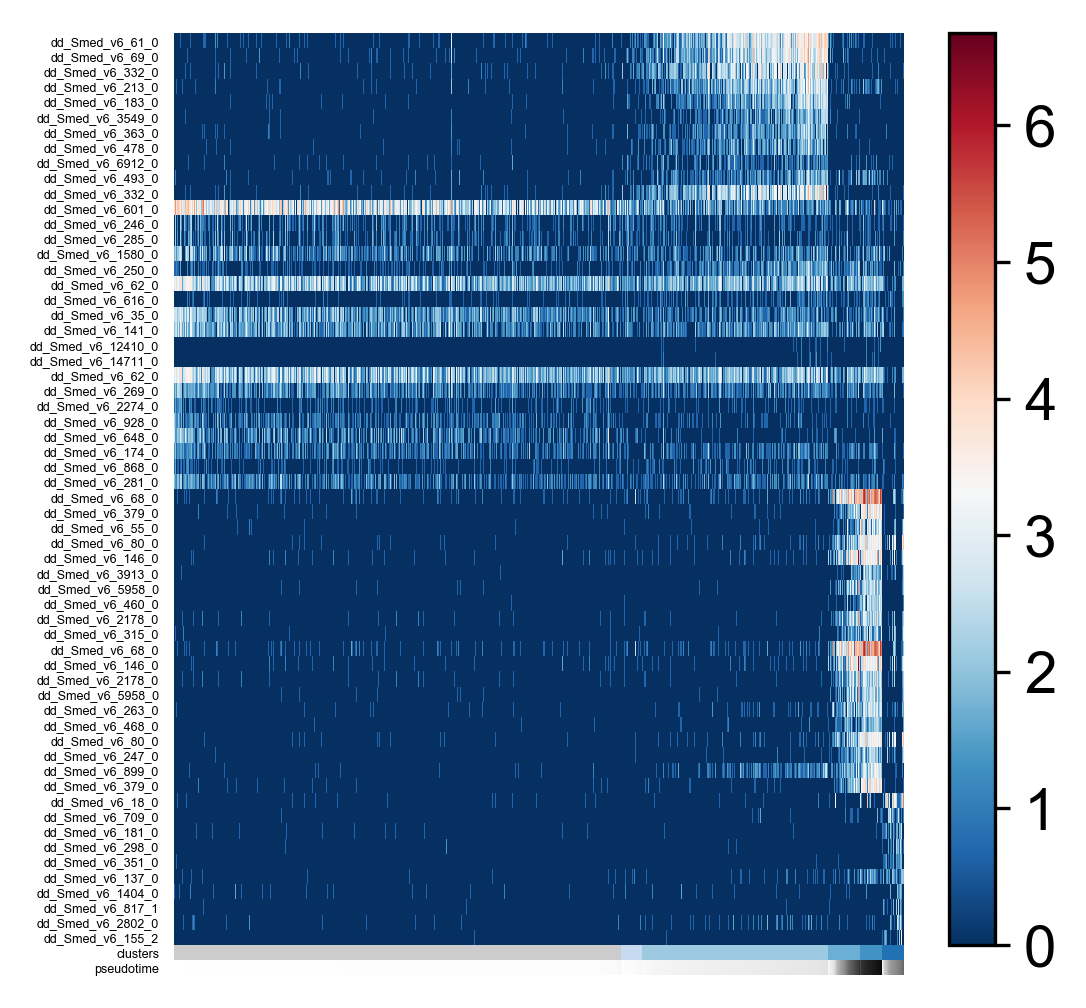

In [36]:
sc.pl.aga_path(adata_full, path_1, epidermal_markers, groups_key='clusters', show_node_names=False, ytick_fontsize=3, save='_epidermal')

## AGA

In [37]:
epidermal_markers = np.unique(epidermal_markers)

In [38]:
adata_epidermal = adata_full[:, epidermal_markers]

In [39]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 21612 × 52 
    obs_keys = ['clusters', 'X_diffmap0', 'aga_pseudotime']
    uns_keys = ['clusters_colors']

In [40]:
epidermal_clusters = [
    'epidermal neoblasts',
    'early epidermal progenitors',
    'late epidermal progenitors 1',
    'late epidermal progenitors 2', 'epidermis']

In [41]:
adata_epidermal = adata_epidermal[adata_full.obs['clusters'].isin(epidermal_clusters)]

In [42]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 4009 × 52 
    obs_keys = ['clusters', 'X_diffmap0', 'aga_pseudotime']
    uns_keys = ['clusters_colors']

In [43]:
all_categories = adata_epidermal.obs['clusters'].cat.categories
adata_epidermal.obs['clusters'].cat.remove_unused_categories(inplace=True)
adata_epidermal.uns['clusters_colors'] = adata_epidermal.uns[
    'clusters_colors'][np.where(np.in1d(all_categories, adata_epidermal.obs['clusters'].cat.categories))[0]]

In [44]:
sc.tl.tsne(adata_epidermal, n_pcs=0)

computing tSNE
    using data matrix X directly (no PCA)
    using the "MulticoreTSNE" package by Ulyanov (2017)
    finished (0:00:13.388)


In [45]:
sc.settings.set_figure_params(dpi=80)

In [46]:
adata_epidermal

AnnData object with n_obs × n_vars = 4009 × 52 
    obs_keys = ['clusters', 'X_diffmap0', 'aga_pseudotime']
    uns_keys = ['clusters_colors']
    obsm_keys = ['X_tsne']

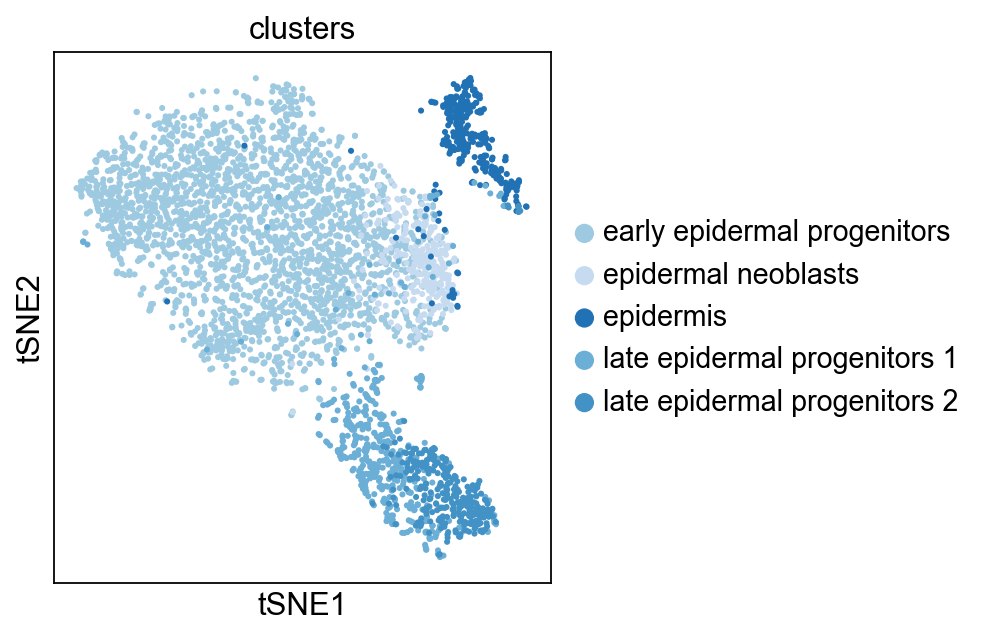

In [47]:
sc.pl.tsne(adata_epidermal, color='clusters')

In [48]:
adata_epidermal = adata_epidermal.copy()  # should not be necessary...

In [49]:
sc.tl.aga(adata_epidermal, groups='clusters', n_neighbors=5, n_pcs=0, recompute_graph=True)

running Approximate Graph Abstraction (AGA)
    no root cell found, no computation of pseudotime
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 5 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9960305691  0.9933023453  0.980799675   0.9733177423
      0.9699940085  0.956743896   0.9432643056  0.9378091097  0.9372125864
      0.9341462255  0.9297118783  0.9281233549  0.9154316187  0.9135451317]
    abstracted graph will have 5 nodes
    finished (0:00:01.922)


saving figure to file ./figures/aga_epidermal.png


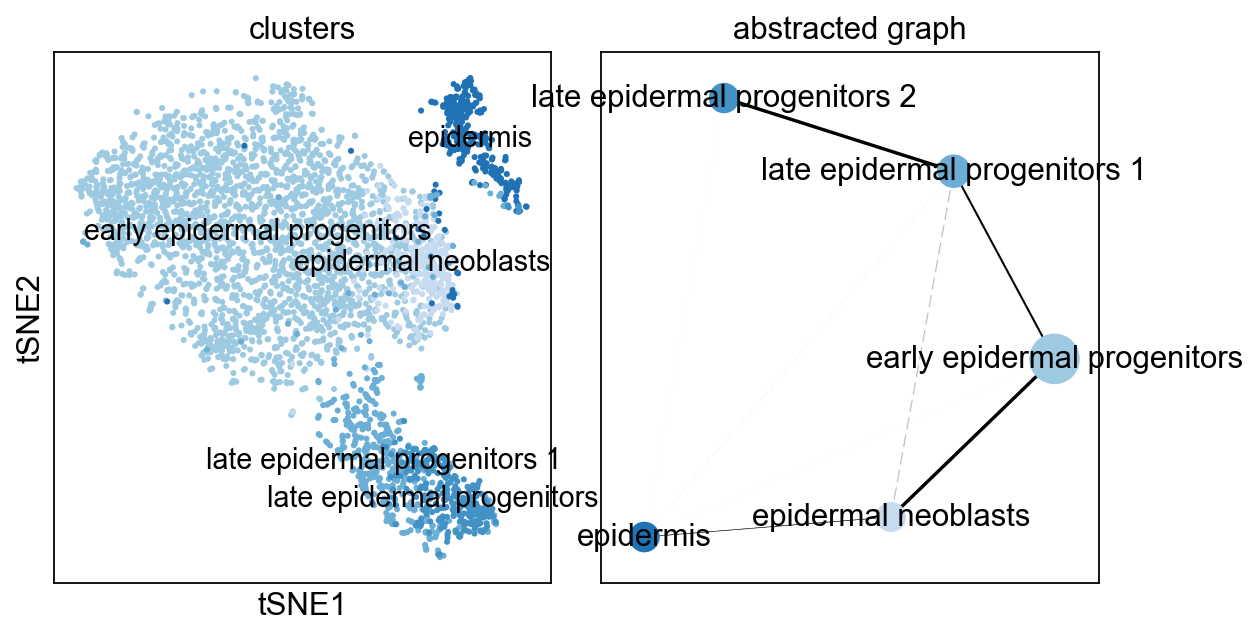

In [50]:
sc.pl.aga(adata_epidermal, save='_epidermal')

In [51]:
adata_epidermal.obs['clusters'].cat.categories.values

array(['early epidermal progenitors', 'epidermal neoblasts', 'epidermis',
       'late epidermal progenitors 1', 'late epidermal progenitors 2'], dtype=object)

In [52]:
adata_epidermal.uns['aga_adjacency_full_attachedness']

array([[   0.,  594.,   29.,  123.,    0.],
       [ 594.,    0.,   70.,   93.,    0.],
       [  29.,   70.,    0.,   43.,   25.],
       [ 123.,   93.,   43.,    0.,  391.],
       [   0.,    0.,   25.,  391.,    0.]])

In [53]:
adata_epidermal.uns['aga_adjacency_full_confidence']

array([[ 0.    ,  1.    ,  0.0043,  0.5937,  0.    ],
       [ 1.    ,  0.    ,  0.1876,  0.3634,  0.    ],
       [ 0.0043,  0.1876,  0.    ,  0.035 ,  0.0015],
       [ 0.5937,  0.3634,  0.035 ,  0.    ,  1.    ],
       [ 0.    ,  0.    ,  0.0015,  1.    ,  0.    ]])